In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**1. Load the data into a Pandas dataframe**

In [ ]:
dataframe = pd.read_csv("/content/challenge2_input.csv")

**Exploratory Data Analysis**

In [ ]:
dataframe.head()

,scheme_code,scheme_name,div_growth,div_reinvest,nav,nav_date
0,118825.0,Mirae Asset Large Cap Fund - Direct Plan - Growth,INF769K01AX2,NaN,36.768,23 Mar 2020
1,118825.0,Mirae Asset Large Cap Fund - Direct Plan - Growth,INF769K01AX2,NaN,37.772,24 Mar 2020
2,118825.0,Mirae Asset Large Cap Fund - Direct Plan - Growth,INF769K01AX2,NaN,39.123,3 Apr 2020
3,118825.0,Mirae Asset Large Cap Fund - Direct Plan - Growth,INF769K01AX2,NaN,39.895,25 Mar 2020
4,118825.0,Mirae Asset Large Cap Fund - Direct Plan - Growth,INF769K01AX2,NaN,40.068,1 Apr 2020


In [ ]:
dataframe.shape

(95, 6)

In [ ]:
dataframe.isnull().sum()

scheme_code      8
scheme_name      0
div_growth       0
div_reinvest    95
nav             20
nav_date         0
dtype: int64

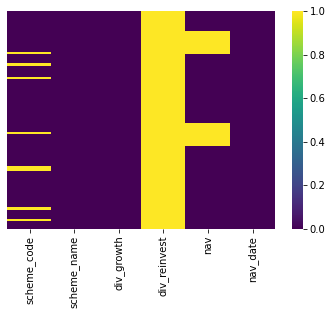

In [ ]:
# heatmap for null
sns.heatmap(dataframe.isnull(), yticklabels=False, cmap="viridis")

**2. Remove records where scheme_code is NULL**

In [ ]:
dataframe = dataframe.drop(dataframe[dataframe.scheme_code.isnull()].index)

**3. Sort the data by nav_date**

In [ ]:
dataframe.sort_values(by='nav_date', ascending=True)

,scheme_code,scheme_name,div_growth,div_reinvest,nav,nav_date
4,118825.0,Mirae Asset Large Cap Fund - Direct Plan - Growth,INF769K01AX2,NaN,40.068,1 Apr 2020
73,118825.0,Mirae Asset Large Cap Fund - Direct Plan - Growth,INF769K01AX2,NaN,57.790,11 Feb 2020
47,118825.0,Mirae Asset Large Cap Fund - Direct Plan - Growth,INF769K01AX2,NaN,50.635,11 Mar 2020
30,118825.0,Mirae Asset Large Cap Fund - Direct Plan - Growth,INF769K01AX2,NaN,44.364,11 May 2020
84,118825.0,Mirae Asset Large Cap Fund - Direct Plan - Growth,INF769K01AX2,NaN,58.064,12 Feb 2020
...,...,...,...,...,...,...
62,118825.0,Mirae Asset Large Cap Fund - Direct Plan - Growth,INF769K01AX2,NaN,57.032,8 Jan 2020
31,118825.0,Mirae Asset Large Cap Fund - Direct Plan - Growth,INF769K01AX2,NaN,44.370,8 May 2020
27,118825.0,Mirae Asset Large Cap Fund - Direct Plan - Growth,INF769K01AX2,NaN,44.098,9 Apr 2020
79,118825.0,Mirae Asset Large Cap Fund - Direct Plan - Growth,INF769K01AX2,NaN,57.903,9 Jan 2020


**4. Fill Missing values in nav column by the last known value in the field after sorting by nav_date (Fill forward)**

In [ ]:
dataframe['nav'] = dataframe['nav'].ffill()

In [ ]:
dataframe.isnull().sum()

scheme_code      0
scheme_name      0
div_growth       0
div_reinvest    87
nav              0
nav_date         0
dtype: int64

**5. Save the output dataframe with the name pandas_challenge_output.csv**

In [ ]:
dataframe.to_csv('pandas_challenge_output.csv', encoding='utf-8')